# Comparison Plots and Composition Plots


## Comparison Plots - Line Chart,Bar Chart,Radar Chart,

In [4]:
pip install matplotlib-venn

  Using cached matplotlib_venn-1.1.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [16]:
# Loading the Top Healthiest Food in the World dataset
df=pd.read_csv('C:/Users/varshini y r/OneDrive/Desktop/dva1/Top Healthiest Food In The World.csv')
df.head()

,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515


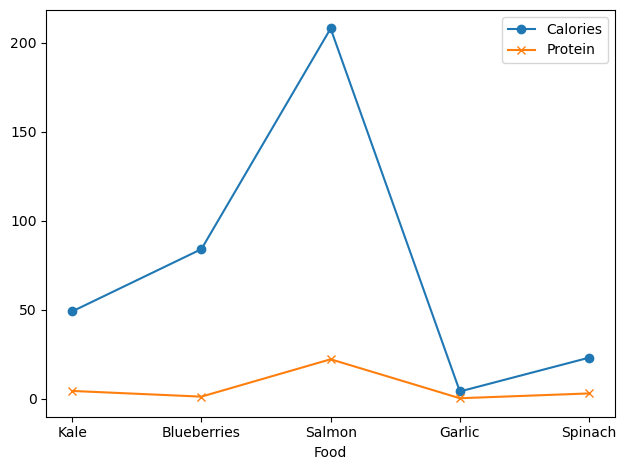

In [17]:
# Line Chart
df1=df.head()
plt.plot(df1['Food'],df1['Calories'],label='Calories',marker='o')
plt.plot(df1['Food'],df1['Protein (g)'],label='Protein',marker='x')
plt.xlabel('Food')
plt.legend()
plt.tight_layout()
plt.show()

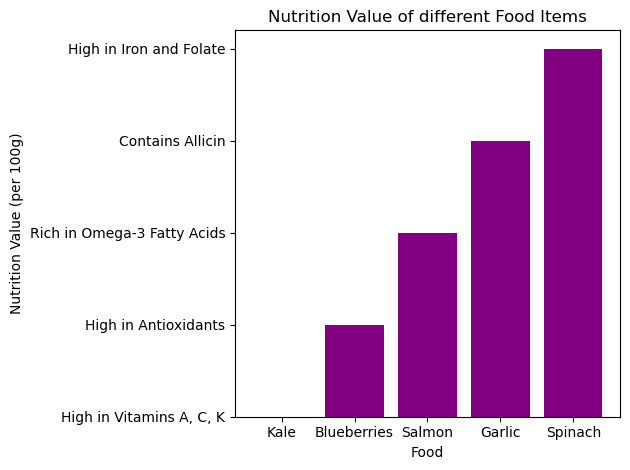

In [18]:
# Bar Chart
plt.bar(df1['Food'],df1['Nutrition Value (per 100g)'],color='purple')
plt.xlabel('Food')
plt.ylabel('Nutrition Value (per 100g)')
plt.title('Nutrition Value of different Food Items')
plt.tight_layout()
plt.show()


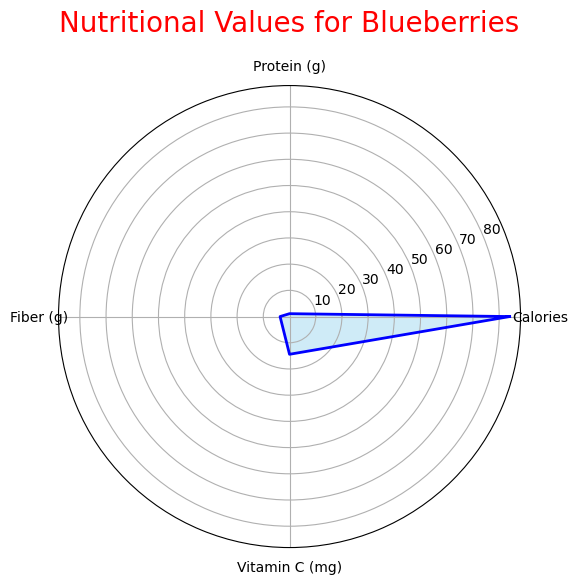

In [19]:
# Radar Chart
food_item=df1[df1['Food'] == 'Blueberries']	
categories=['Calories','Protein (g)','Fiber (g)','Vitamin C (mg)']
values=food_item[categories].values.flatten().tolist()
values+=values[:1]
n=len(categories)
angles=np.linspace(0,2*np.pi,n,endpoint=False).tolist()
angles+=angles[:1]
fig,ax=plt.subplots(figsize=(6,6),subplot_kw=dict(polar=True))
ax.fill(angles,values,color='skyblue',alpha=0.4)
ax.plot(angles,values,color='blue',linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Nutritional Values for Blueberries',size=20,color='red',y=1.1)
plt.show()

## Composition Plots - Pie Chart,Donut Chart,Stacked Bar Chart,Stacked Area Chart,Venn Diagram

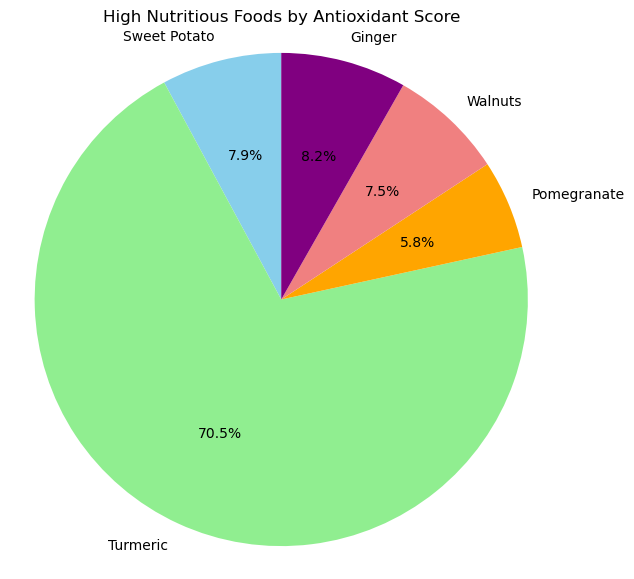

In [20]:
# Pie Chart
threshold=10000
high_nutritious_foods=df[df['Antioxidant Score'] >= threshold]
df2=high_nutritious_foods.head()
labels=df2['Food']
sizes=df2['Antioxidant Score']
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=['skyblue','lightgreen','orange','lightcoral','purple'])
plt.axis('equal')
plt.title('High Nutritious Foods by Antioxidant Score')
plt.show()

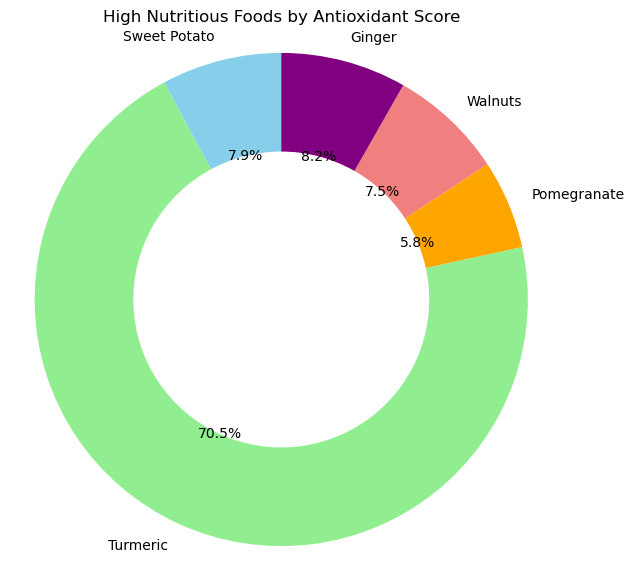

In [21]:
# Donut Chart
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=['skyblue','lightgreen','orange','lightcoral','purple'],
wedgeprops=dict(width=0.4))
plt.axis('equal')
plt.title('High Nutritious Foods by Antioxidant Score')
plt.show()

C:\Users\varshini y r\AppData\Local\Temp\ipykernel_13168\3280382982.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.bar(ind,vitamin_c,bar_width,bottom=np.add(calories,protein,fiber),label='Vitamin C',color='lightcoral')


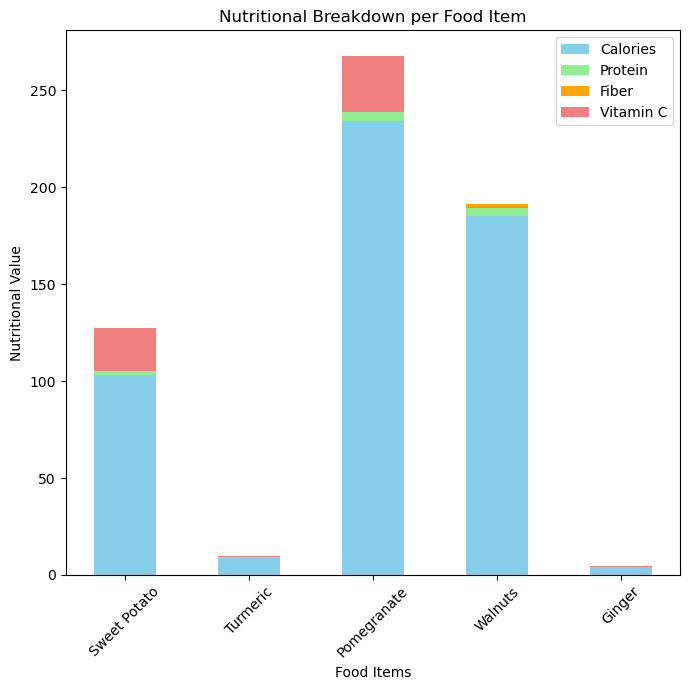

In [22]:
# Stacked Bar Chart
foods=df2['Food']
calories=df2['Calories']
protein=df2['Protein (g)']
fiber=df2['Fiber (g)']
vitamin_c=df2['Vitamin C (mg)']
antioxidant_score=df2['Antioxidant Score']
bar_width=0.5
ind=range(len(foods))
plt.figure(figsize=(7,7))
plt.bar(ind,calories,bar_width,label='Calories',color='skyblue')
plt.bar(ind,protein,bar_width,bottom=calories,label='Protein',color='lightgreen')
plt.bar(ind,fiber,bar_width,bottom=np.add(calories,protein),label='Fiber',color='orange')
plt.bar(ind,vitamin_c,bar_width,bottom=np.add(calories,protein,fiber),label='Vitamin C',color='lightcoral')

plt.xlabel('Food Items')
plt.ylabel('Nutritional Value')
plt.title('Nutritional Breakdown per Food Item')
plt.xticks(ind,foods,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



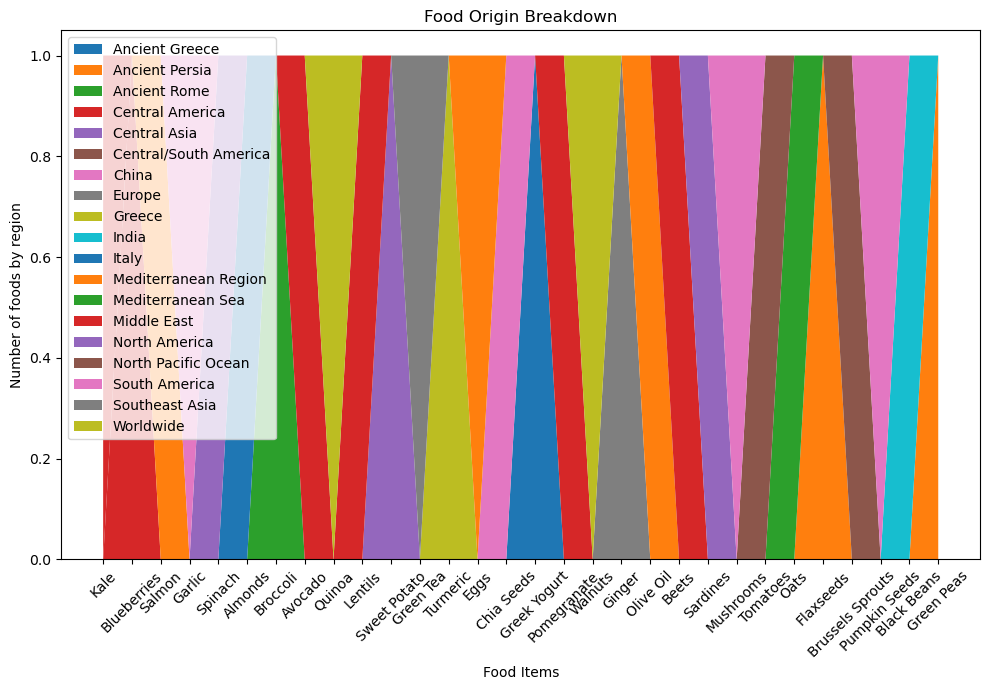

In [23]:
# Stacked Area Chart
df3=df.head(30)
pivot_data=pd.crosstab(df3['Food'],df3['Originated From'])
foods=df3['Food'].unique()
x=range(len(foods))
plt.figure(figsize=(10,7))
plt.stackplot(x,pivot_data.T,labels=pivot_data.columns)
plt.xticks(x,foods,rotation=45)
plt.xlabel('Food Items')
plt.ylabel('Number of foods by region')
plt.title('Food Origin Breakdown')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

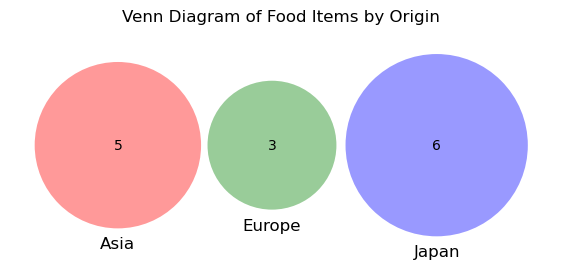

In [24]:
# Venn Diagram
Asia_foods=set(df[df['Originated From'] == 'Central Asia']['Food'])
Europe_foods=set(df[df['Originated From'] == 'Europe']['Food'])
Japan_foods=set(df[df['Originated From'] == 'North America']['Food'])
plt.figure(figsize=(7,7))
venn3([Asia_foods,Europe_foods,Japan_foods],set_labels=('Asia','Europe','Japan'))
plt.title('Venn Diagram of Food Items by Origin')
plt.show()
